In [2]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")


import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import geopandas as gpd
import math
import random

C:\Users\LINHKHANHSPC\AppData\Local\Temp\ipykernel_20212\2554621096.py:21: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


# Step 4: Working with Weather Data

In [4]:
# import the weather data
wd = pd.read_csv("SanFrancisco", encoding="ISO-8859-1", index_col=0)
# show first 20 rows
wd.head(20)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
city,,,,,,,,
San Francisco,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
San Francisco,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0
San Francisco,2015-01-01 10:56:00,10.0,33.0,Fair,1018.60,28.0,0.0,10.0
San Francisco,2015-01-01 11:56:00,9.0,33.0,Fair,1018.60,19.0,0.0,7.0
San Francisco,2015-01-01 12:56:00,9.0,33.0,Fair,1018.60,20.0,0.0,6.0
San Francisco,2015-01-01 13:56:00,9.0,33.0,Fair,1018.94,15.0,0.0,6.0
San Francisco,2015-01-01 14:56:00,9.0,34.0,Fair,1019.62,28.0,0.0,5.0
San Francisco,2015-01-01 15:56:00,9.0,34.0,Fair,1019.96,22.0,0.0,6.0
San Francisco,2015-01-01 16:56:00,10.0,34.0,Fair,1020.63,19.0,0.0,10.0


In [ ]:
# take a look at the data types and general information
wd.info()
wd.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 76631 entries, San Francisco to San Francisco
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 5.3+ MB


,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,76619.000000,76630.000000,76613.000000,76592.000000,76631.000000,76614.000000
mean,14.645388,29.215020,1016.244545,16.562722,0.062102,14.534915
std,4.030852,5.110355,4.866743,11.432207,0.456781,4.203518
min,2.000000,4.000000,986.440000,0.000000,0.000000,-1.000000
25%,12.000000,27.000000,1013.190000,7.000000,0.000000,12.000000
50%,14.000000,29.000000,1015.890000,15.000000,0.000000,14.000000
75%,17.000000,33.000000,1019.280000,24.000000,0.000000,17.000000
max,39.000000,47.000000,1035.530000,391.000000,18.540000,37.000000


In [ ]:
# convert timestamp to datetime
wd['timestamp'] = pd.to_datetime(wd['timestamp'],format ='%Y-%m-%d %H:%M:%S')

# extract the year from timestamp
wd['year'] = wd['timestamp'].dt.year

# only the data for the year 2019 is important, so we drop all the other entries.
wd = wd[wd['timestamp'].dt.year == 2019]

In [ ]:
# check first 20 entries 
wd.head(20)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,year
city,,,,,,,,,
San Francisco,2019-01-01 00:56:00,12.0,30.0,Partly Cloudy,1016.23,31.0,0.0,12.0,2019
San Francisco,2019-01-01 01:56:00,12.0,33.0,Fair / Windy,1016.57,35.0,0.0,12.0,2019
San Francisco,2019-01-01 02:56:00,12.0,33.0,Fair / Windy,1017.25,46.0,0.0,12.0,2019
San Francisco,2019-01-01 03:56:00,12.0,33.0,Fair / Windy,1017.25,44.0,0.0,12.0,2019
San Francisco,2019-01-01 04:56:00,11.0,33.0,Fair / Windy,1017.92,35.0,0.0,11.0,2019
San Francisco,2019-01-01 05:56:00,11.0,33.0,Fair / Windy,1017.59,52.0,0.0,11.0,2019
San Francisco,2019-01-01 06:56:00,10.0,33.0,Fair / Windy,1017.92,44.0,0.0,10.0,2019
San Francisco,2019-01-01 07:56:00,11.0,33.0,Fair,1018.60,30.0,0.0,11.0,2019
San Francisco,2019-01-01 08:56:00,11.0,33.0,Fair,1018.94,31.0,0.0,11.0,2019


In [ ]:
# after transforming the data we check if there are any non-defined values.
wd.isna().sum()

timestamp                  0
temperature                3
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  6
precipitation              0
felt_temperature           4
year                       0
dtype: int64

In [ ]:
# drop all rows with missing values
weather_2019 = wd.dropna(axis = 0)
weather_2019.info()
weather_2019.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9494 entries, San Francisco to San Francisco
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9494 non-null   datetime64[ns]
 1   temperature              9494 non-null   float64       
 2   cloud_cover              9494 non-null   float64       
 3   cloud_cover_description  9494 non-null   object        
 4   pressure                 9494 non-null   float64       
 5   windspeed                9494 non-null   float64       
 6   precipitation            9494 non-null   float64       
 7   felt_temperature         9494 non-null   float64       
 8   year                     9494 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(1)
memory usage: 704.6+ KB


,timestamp,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,year
count,9494,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.000000,9494.0
mean,2019-07-03 16:10:22.435222272,14.692753,28.796398,1015.035008,16.785338,0.079433,14.549821,2019.0
min,2019-01-01 00:56:00,3.000000,4.000000,993.550000,0.000000,0.000000,1.000000,2019.0
25%,2019-04-02 18:11:00,12.000000,27.000000,1012.510000,7.000000,0.000000,12.000000,2019.0
50%,2019-07-04 00:26:00,14.000000,29.000000,1014.880000,15.000000,0.000000,14.000000,2019.0
75%,2019-10-03 06:41:00,17.000000,33.000000,1017.920000,24.000000,0.000000,17.000000,2019.0
max,2019-12-31 23:56:00,36.000000,40.000000,1030.790000,67.000000,11.940000,34.000000,2019.0
std,NaN,4.296878,5.498910,4.908431,11.103065,0.486799,4.491948,0.0


In [ ]:
df_w_idle_time = pd.read_csv('idle_time_calculated')

In [ ]:
df_w_idle_time

,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time
0,0,2019-01-01 01:05:01,3,5426,0,0 days 00:00:00
1,1,2019-01-01 01:11:19,3,5481,1,0 days 00:00:00
2,2,2019-01-01 01:23:27,3,5216,1,0 days 00:00:00
3,3,2019-01-01 01:40:07,3,5426,1,0 days 00:00:00
4,4,2019-01-01 05:03:40,3,5191,1,0 days 00:00:00
...,...,...,...,...,...,...
4814485,4814485,2019-12-30 14:29:13,498,10962,0,0 days 00:00:23
4814486,4814486,2019-12-30 14:29:36,498,10962,1,0 days 00:00:00
4814487,4814487,2019-12-30 14:36:08,498,10962,0,0 days 20:52:52
4814488,4814488,2019-12-31 11:29:00,498,10962,1,0 days 00:00:00


In [ ]:
df_w_idle_time["timestamp"]= pd.to_datetime(df_w_idle_time["timestamp"],format ='%Y-%m-%d %H:%M:%S')

In [ ]:
df_w_idle_time['day'] = df_w_idle_time['timestamp'].dt.day
df_w_idle_time['hour'] = df_w_idle_time['timestamp'].dt.hour

In [ ]:
def rental_frequency_per_hour(df):
    df = df.groupby(['station_id', 'day', 'hour'])
    results = [] 
    
    for group_name, group_data in df:
        bike_count = 0
        # hour = group_data.at[0,'timestamp'].hour
        
        for index, row in group_data.iterrows():

            if row['rented'] == 1:
                bike_count += 1
                   
        group_data['bike_frequency'] = bike_count
            
        results.append(group_data)

    modified_df = pd.concat(results, ignore_index=True)
    return modified_df

In [ ]:
df_frequency = rental_frequency_per_hour(df_w_idle_time)

In [ ]:
df_frequency.tail(50)

,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,day,hour,bike_frequency
4814399,4814404,2019-12-30 15:57:36,493,11904,0,20.450000,30,15,0
4814400,4814405,2019-12-30 16:17:23,493,3111,0,0.666667,30,16,1
4814402,4814407,2019-12-30 16:21:35,493,9573,0,1094.283333,30,16,1
4814404,4813720,2019-11-30 18:34:18,493,1382,0,95.450000,30,18,1
4814405,4813721,2019-11-30 18:56:41,493,13013,0,73.066667,30,18,1
4814406,4814408,2019-12-30 18:23:52,493,10849,0,972.000000,30,18,1
4814408,4813723,2019-11-30 22:36:17,493,11197,0,638.833333,30,22,0
4814410,4814410,2019-12-31 12:20:37,493,3475,0,168.233333,31,12,0
4814411,4814411,2019-12-31 13:17:45,493,11177,0,111.100000,31,13,0
4814413,4814413,2019-12-31 15:11:05,493,545204,0,0.000000,31,15,1


In [ ]:
df_frequency['idle_time'] = pd.to_timedelta(df_frequency['idle_time']).dt.total_seconds() / 60.0

Text(0.5, 1.0, 'Idle time according to rental frequency per hour')

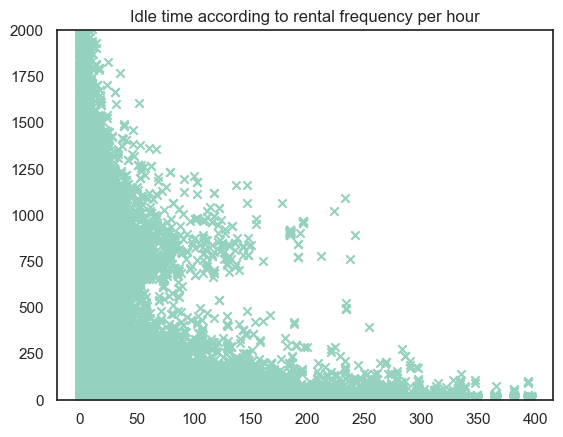

In [ ]:
plt.scatter(df_frequency.bike_frequency, df_frequency.idle_time, marker = 'x')
plt.ylim(0,2000)
plt.title("Idle time according to rental frequency per hour")

In [ ]:
df_frequency = df_frequency[df_frequency['rented']==0]

In [ ]:
df_frequency.to_csv("df_w_freq")

In [5]:
df_predict = pd.read_csv("df_w_freq")

MemoryError: Unable to allocate 36.7 MiB for an array with shape (2407245,) and data type complex128

In [ ]:
df_predict.drop(df_predict[df_predict.idle_time==0].index, inplace = True)
df_predict

,Unnamed: 0.1,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,day,hour,bike_frequency
0,0,19822,2019-04-01 00:30:01,3,3434,0,35.933333,1,0,3
1,2,32267,2019-06-01 00:15:46,3,1589,0,55.816667,1,0,3
2,3,37976,2019-07-01 00:27:30,3,2103,0,454.100000,1,0,3
3,4,55420,2019-10-01 00:07:59,3,9806,0,97.066667,1,0,3
5,14,32269,2019-06-01 01:23:27,3,2105,0,63.133333,1,1,10
...,...,...,...,...,...,...,...,...,...,...
2407239,4814477,4814477,2019-12-23 17:13:33,498,12424,0,1.083333,23,17,1
2407240,4814479,4814479,2019-12-23 17:58:33,498,353685,0,975.483333,23,17,1
2407241,4814481,4814481,2019-12-24 10:41:14,498,10310,0,196.016667,24,10,1
2407242,4814485,4814485,2019-12-30 14:29:13,498,10962,0,0.383333,30,14,1


In [ ]:
df_predict.drop(df_predict[(df_predict.idle_time>2400) | df_predict.idle_time < 1].index, inplace = True)
df_predict

In [ ]:
df_predict['idle_time'] =  df_predict['idle_time'] / 60.0
df_predict

,Unnamed: 0.1,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,day,hour,bike_frequency
0,0,19822,2019-04-01 00:30:01,3,3434,0,0.598889,1,0,3
1,2,32267,2019-06-01 00:15:46,3,1589,0,0.930278,1,0,3
2,3,37976,2019-07-01 00:27:30,3,2103,0,7.568333,1,0,3
3,4,55420,2019-10-01 00:07:59,3,9806,0,1.617778,1,0,3
5,14,32269,2019-06-01 01:23:27,3,2105,0,1.052222,1,1,10
...,...,...,...,...,...,...,...,...,...,...
2407237,4814472,4814472,2019-12-31 08:27:08,495,12716,0,4.239167,31,8,1
2407239,4814477,4814477,2019-12-23 17:13:33,498,12424,0,0.018056,23,17,1
2407240,4814479,4814479,2019-12-23 17:58:33,498,353685,0,16.258056,23,17,1
2407241,4814481,4814481,2019-12-24 10:41:14,498,10310,0,3.266944,24,10,1


In [ ]:
X = df_predict["bike_frequency"].values
y = df_predict["idle_time"].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 10
poly_model = PolynomialFeatures(degree= degree,include_bias= False)

X_poly_train = poly_model.fit_transform(X_train.reshape(-1,1))
X_poly_test = poly_model.fit_transform(X_test.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scale_train = scaler.fit_transform(X_poly_train)
X_scale_test = scaler.transform(X_poly_test)

In [ ]:
regression_model = LinearRegression()

regression_model.fit(X_scale_train, y_train)
print(regression_model.coef_ ,regression_model.intercept_)
regression_model.coef_
regression_model.intercept_

[-1.86389530e+03  2.01039122e+04 -1.37386693e+05  6.19455679e+05
 -1.85007933e+06  3.65597622e+06 -4.71097707e+06  3.79641859e+06
 -1.73352311e+06  3.41798501e+05] 86.68340513275604


86.68340513275604

In [ ]:
from sklearn.linear_model import Ridge

# initialize model
model_L2 = Ridge(alpha = 10**2, solver = 'lsqr') # select least squares regression as solver

# train model
model_L2.fit(X_scale_train, y_train)

Ridge(alpha=100, solver='lsqr')

In [ ]:
def plot_L2_regression_performance ():

    err_train = []
    err_cv = []

    for alpha in np.logspace(-10,10,50):

        # fit model
        model_L2 = Ridge(alpha = alpha, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(X_scale_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_scale_train), y_train))
        err_cv.append(mean_squared_error(model_L2.predict(X_scale_test), y_test))


    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-10,10,50), err_train, np.logspace(-10,10,50), err_cv)
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()

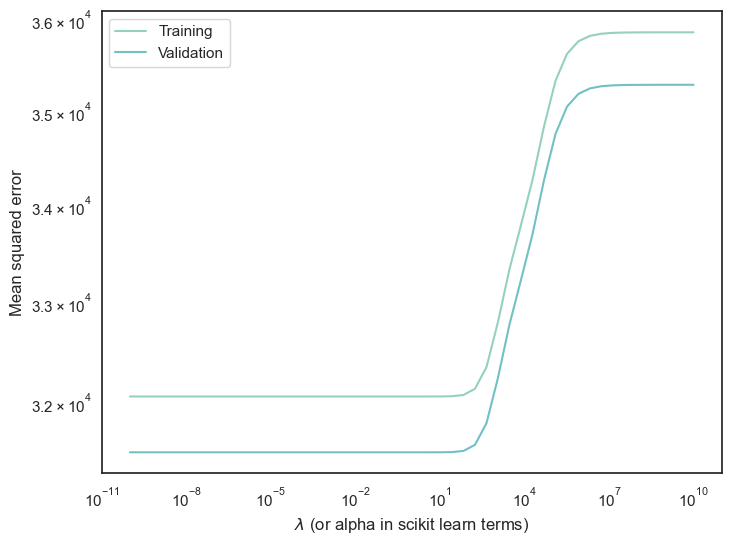

In [ ]:
plot_L2_regression_performance ()

In [ ]:
train_pred = regression_model.predict(X_scale_test)

print("MAE:",mean_absolute_error(y_test, train_pred))
print("RMSE:",(mean_squared_error(y_test, train_pred)))  
print("R2:",r2_score(y_test, train_pred))

MAE: 81.81436940750686
RMSE: 26910.630086988796
R2: 0.23734925335618628


In [ ]:
def plot_regression_poly_scikit(X,Y,d):
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

    sorted_indices = np.argsort(X_test)
    X_test_sorted = x_test[sorted_indices]
    y_test_sorted = y_test[sorted_indices]
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures(degree = d)
    
    # polynomial transformation
    X_train_poly = poly_reg.fit_transform(x_train.reshape(-1,1))
    X_test_poly = poly_reg.fit_transform(X_test_sorted.reshape(-1,1))
    
    # scale
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    # fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(X_train_poly_scaled, y_train)
    model_pred = lin_reg_Poly.predict(X_test_poly_scaled)
    
    # plotting the regression line and the data (we have to transform the inputs as well!)
    # Sort the training data for plotting
    # sorted_indices = np.argsort(X_test)
    # X_test_sorted = x_test[sorted_indices]
    # model_pred_sorted = model_pred[sorted_indices]
    plt.figure(figsize = (8,6))
    plt.scatter(X_test_sorted,y_test_sorted,marker="x", c='C2')
    ylim = plt.ylim()
    plt.scatter(X_test_sorted,model_pred, color = "red")
    plt.xlabel("Rental frequency")
    plt.ylabel("Idle time")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(y_test_sorted, model_pred))
    #print(lin_reg_Poly.coef_)

In [ ]:
plot_regression_poly_scikit(X = X, Y = y, d = 30)

NameError: name 'plot_regression_poly_scikit' is not defined

In [ ]:
pred_2 = model_L2.predict(X_scale_test)
print("R2:",r2_score(y_test, pred_2))

R2: 0.000195177208532904


In [ ]:
# extract the hours of the weather data and the data with idle time


# Now we want to extract the hours of the weather data and match them with idle time
df_w_idle_time["timestamp"]= pd.to_datetime(df_w_idle_time["timestamp"],format ='%Y-%m-%d %H:%M:%S')
df_w_idle_time['timestamp'] = df_w_idle_time['timestamp'].dt.floor('H')
df_w_idle_time = df_w_idle_time[df_w_idle_time['rented'] == 0]

weather_2019['timestamp'] = weather_2019['timestamp'].dt.floor('H')

# Merge two tables 
df_features= pd.merge(df_w_idle_time, weather_2019, on='timestamp')

# convert idle_time to minutess
df_features['idle_time'] = pd.to_timedelta(df_features['idle_time']).dt.total_seconds() / 60.0

df_features

C:\Users\LINHKHANHSPC\AppData\Local\Temp\ipykernel_16996\1037800461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2019['timestamp'] = weather_2019['timestamp'].dt.floor('H')


,Unnamed: 0,timestamp,station_id,bike_id,rented,idle_time,bike_count,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,year
0,0,2019-01-01 01:00:00,3,5426,0,0.000000,0,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
1,85556,2019-01-01 01:00:00,5,5426,0,2.183333,0,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
2,341380,2019-01-01 01:00:00,14,5157,0,520.583333,0,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
3,341381,2019-01-01 01:00:00,14,4952,0,510.483333,0,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
4,564882,2019-01-01 01:00:00,19,5272,0,372.650000,0,12.0,33.0,Fair / Windy,1016.57,35.0,0.00,12.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610954,4585658,2019-02-02 05:00:00,377,5159,0,153.166667,0,12.0,11.0,Light Rain,1001.68,17.0,0.51,12.0,2019
2610955,4711841,2019-10-16 02:00:00,408,6731,0,10.683333,0,13.0,33.0,Fair,1016.23,31.0,0.00,13.0,2019
2610956,4711843,2019-10-16 02:00:00,408,6731,0,8.933333,0,13.0,33.0,Fair,1016.23,31.0,0.00,13.0,2019
2610957,4711845,2019-10-16 02:00:00,408,6731,0,5.000000,0,13.0,33.0,Fair,1016.23,31.0,0.00,13.0,2019


In [ ]:
# Now we want to investigate the correlation between all the available features and the target variable (idle time). This can be achieved using a heatmap
weather_features = df_features[['idle_time','temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation','felt_temperature']]

In [ ]:
corr = weather_features.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

Looking at the heatmap, we can pick out the variables which are possibly correlated to idle time: temperature and windspeed. However, temperature and windspeed are also correlated (covariance 0.2) so we decided to only include temperature. The Cloud Cover Description, although not considered here, could also be interesting, which we will take a look at in the next steps.

In [ ]:
# let's have a look at the temperature in Sanfrancisco in 2019
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(weather_2019["timestamp"],weather_2019["temperature"])
ax.set_xlabel("Date")
ax.set_ylabel("Grad")
ax.set_title("Temperature in Sanfrancisco in 2019")
plt.show()


Our goal is to find out how the weather affects the bike rent business. We want to analyze the correlation between different conditions of weather (e.g Temperature, Windspeed) and the idle time of bike stations.

In [ ]:
#Let's visualize the idle time with temperature
# first, let's create a figure object
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

# define plot
ax.scatter(df_features["temperature"], df_features["idle_time"])

# add axis and title labels
ax.set_xlabel("Temperature")
ax.set_ylabel("idle_time(min)")
ax.set_title("Correlation between temperature and idle_time")

# save figure and show
plt.show()

In [ ]:
unique_cloud_cover = wd['cloud_cover_description'].unique()
print(unique_cloud_cover)


In [ ]:
wd_rain = weather_2019[['timestamp', 'cloud_cover_description']]
rain_values = ['Rain', 'Light Rain', 'Light Rain / Windy', 'Rain / Windy', 'Heavy Rain',
               'Heavy Rain / Windy', 'Light Rain with Thunder', 'Light Drizzle']
wd_rain['rain'] = (wd_rain['cloud_cover_description'].isin(rain_values)).astype(int)
# wd_rain
df_features = pd.merge(df_features, wd_rain, on='timestamp')


#### Description of the Hypothesis Test:

We conducted a hypothesis test to examine the average waiting time during rainy hours compared to non-rainy hours in a specific dataset. The purpose was to determine if there is a statistically significant difference in waiting times between rainy and non-rainy hours overall.

Null Hypothesis (H0): The average idle time in rainy hours is less than that in non-rainy hours.

Alternative Hypothesis (HA): The average idle time in rainy hours is greater than that in non-rainy hours.

A significance level of 0.05 was chosen. If the resulting p-value is below the significance level, we reject the null hypothesis, indicating a statistically significant difference in the average waiting time between rainy and non-rainy hours. Conversely, if the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, implying no statistically significant difference

In [ ]:
import scipy.stats as stats

rain = df_features[df_features['rain'] == 1.0]['idle_time']
non_rain= df_features[df_features['rain'] == 0.0]['idle_time']


# Hypothesis test (paired t-Test)
t_statistic, p_value = stats.ttest_ind(rain , non_rain, alternative = 'greater', equal_var = False)

# print results
alpha = 0.05  # Significance level
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
if p_value < alpha:
    print("H0 is rejected: idle time in rainy hours is statistically greater than that in non rainy hours.")
else:
    print("H0 cannot be rejected")

From the t-test we can conclude that the rain affects the idle time such that bike station stays idle longer during rainy hours.

In [ ]:

#We add another feature which is day of week as we want to inspect its effect later.
def get_weekday(ts):
    if ts.weekday() in [0,1,2,3,4]:
     return 1
    else :
     return 0
    

df_features['hour']= df_features['timestamp'].dt.hour
df_features['IsWeekday']= df_features["timestamp"].apply(lambda x: get_weekday(x))


In [ ]:
df_features['month']= df_features['timestamp'].dt.month

In [ ]:
df_features.drop(['cloud_cover_description_x', 'cloud_cover_description_y', 'year' , 'rented', ], axis=1, inplace= True)
df_features.drop('Unnamed: 0', axis = 1)

# Working with location data

In [ ]:

location_df=pd.read_csv("NorthernCalifornia_POIs")
clean_df = pd.read_csv("baywheels_2019_cleaned")
location_df= location_df.drop(location_df[(location_df['lat'].isnull())| (location_df['lon'].isnull())].index)



In [ ]:
location_geo = gpd.GeoDataFrame(location_df, geometry=gpd.points_from_xy(location_df['lon'], location_df['lat']))


In [ ]:
city =["San Francisco","South San Francisco", "San Jose","Oakland"]
location_geo = location_geo[location_geo['addr:city'].isin(city)] 

In [ ]:
location_geo['amenity'].unique()


In [ ]:
location_geo.dropna(axis= 'columns',thresh=2000, inplace=True)


In [ ]:
station_location = clean_df.loc[:,['start_station_id', 'start_station_lat', 'start_station_lon']]
station_location.rename(columns = {"start_station_id": "station_id", "start_station_lat": "lat","start_station_lon": "lon"}, inplace=True)

In [ ]:
station_location=station_location.drop_duplicates(subset='station_id')
station_location.sort_values(by= 'station_id',inplace= True)


In [ ]:
station_geo = gpd.GeoDataFrame(station_location, geometry=gpd.points_from_xy(station_location['lon'], station_location['lat']))



In [ ]:
public_transport =["bus_station"]
bus_geo = location_geo[location_geo['amenity'].isin(public_transport)] 
school= ["college","university","school"]
school_geo = location_geo[location_geo['amenity'].isin(school)]
leisure =["pub","bar","cafe","restaurant","fast_food","nightclub","cinema","theater"]
leisure_geo = location_geo[location_geo['amenity'].isin(leisure)]


In [ ]:
station_geo = station_geo.set_crs(epsg=4326)
location_geo = location_geo.set_crs(epsg=4326)
bus_geo = bus_geo.set_crs(epsg=4326)
school_geo = school_geo.set_crs(epsg=4326)
leisure_geo = leisure_geo.set_crs(epsg=4326)

In [ ]:
location_geo = location_geo.to_crs(epsg= 25832)
station_geo = station_geo.to_crs(epsg= 25832)
bus_geo = bus_geo.to_crs(epsg= 25832)
school_geo = school_geo.to_crs(epsg= 25832)
leisure_geo = leisure_geo.to_crs(epsg= 25832)

In [ ]:
bus_geo = bus_geo.reset_index(drop=True)
station_geo = station_geo.reset_index(drop=True)
school_geo = school_geo.reset_index(drop=True)
leisure_geo = leisure_geo.reset_index(drop=True)


In [ ]:
buffered_bus_station = bus_geo.buffer(1000)
all_bus_station = buffered_bus_station.unary_union 
station_geo['near_bus_station'] = station_geo.within(all_bus_station)
station_geo['near_bus_station'] = station_geo['near_bus_station'].replace(True,1)
station_geo['near_bus_station'] = station_geo['near_bus_station'].replace(False,0)

buffered_school = school_geo.buffer(1000)
all_schools = buffered_school.unary_union 
station_geo['near_school'] = station_geo.within(all_schools)
station_geo['near_school'] = station_geo['near_school'].replace(True,1)
station_geo['near_school'] = station_geo['near_school'].replace(False,0)
buffered_leisure = leisure_geo.buffer(1000)
all_leisure = buffered_leisure.unary_union 
station_geo['near_leisure_spots'] = station_geo.within(all_leisure)
station_geo['near_leisure_spots'] = station_geo['near_leisure_spots'].replace(True,1)
station_geo['near_leisure_spots'] = station_geo['near_leisure_spots'].replace(False,0)



In [ ]:
df_features = pd.merge(df_features, station_geo, on='station_id', how='inner')



In [ ]:
df_features.drop(['Unnamed: 0','geometry'], axis=1, inplace=True)

In [ ]:
#df_features.drop(['cloud_cover','windspeed','pressure','precipitation','felt_temperature'],axis=1,inplace = True)
df_features.drop(['cloud_cover','pressure','precipitation','felt_temperature'],axis=1,inplace = True)

In [ ]:
df_features

In [ ]:
df_features = df_features[df_features.idle_time >0]

In [ ]:
# We want to observe how the location of the station (whether it is close to important places) affects the idle time 
g = sns.FacetGrid(df_features, col = 'near_bus_station', row = 'near_school', height = 5, ylim = (0,40000))
g.map_dataframe(sns.scatterplot, x="near_leisure_spots", y ='idle_time')
g.set_ylabels("Idle Time (Minute)")


The first noticable pattern is the idle time can get up to very long if the station is not near any school or bus station. Being close to bus stations reduces the idle time evidently. Obviously, being close to schools, bus stations and leisure spots at the same time keeps the idle time in average even lower, since this is probably a busy spot.

In [ ]:
df_features.to_csv("Predict_ready_df")